---
title: Solving Nonlinear Problems with Scipy Optimize and pyCMA
---

## Introduction

Nonlinear solvers can suffer from the possibility of reaching local minima if the initial guess is too far away from the best minimum solution.  This is especially true when trying to fit nonlinear functions.  This example contrasts the difference between the scipy optimize function and the pyCMA package.

The pyCMA package provides python with an implementation of the "covariance matrix adaptation evolutionary strategy" (wikipedia page [here](https://en.wikipedia.org/wiki/CMA-ES)).  You can install the pycma package from the command line by executing ```pip install cma```.

In [1]:
%matplotlib inline

Import all necessary packages

In [2]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import numpy.random
import cma

create a function for plotting solutions against the input data

In [3]:
def plot_params(parameters):
    w,w0 = parameters
    y_model = numpy.sin(w*x-w*w0)
    p = plt.plot(x,y_model,'r-.')
    p = plt.plot(x,y_data,'bo')
    return p

create the x array

In [4]:
x = numpy.r_[-10:10:.1]

define your model parameters

In [5]:
parameters = (2.1,.24)

split model parameters into frequency and frequency offset

In [6]:
w,w0 = parameters

Build the original model as a sine function.  This is ideal because you can reach many local minima as a function of $\omega$ and $\omega_0$

In [7]:
y = numpy.sin(w*x-w*w0)

Add some random noise

In [8]:
rand = numpy.random.randn(*y.shape)/10
y_data = y+rand

And plot the model data with noise against the original model

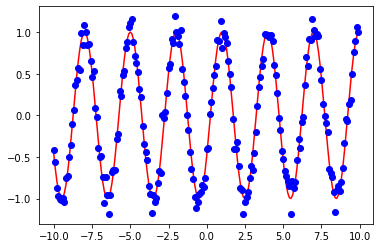

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
a=ax.plot(x,y,'r')
b=ax.plot(x,y_data,'bo')


Now create a function that returns the sum of squared error between a model guess and the original model data

In [10]:
def myfunc(parameters):
    w,w0 = parameters
    y_model = numpy.sin(w*x-w*w0)
    error = ((y_model-y_data)**2).sum()
    return error

Now find out the error of the actual model against its own noise;

In [11]:
myfunc([2.1,.24])

2.093829724940322

Now define an initial guess for the solver to try to find the parameters itself

In [12]:
ini = [1,.5]

In [13]:
sol = scipy.optimize.minimize(myfunc,ini)
sol.fun

103.84110620139793

In [14]:
sol.x

array([0.00774282, 3.58238206])

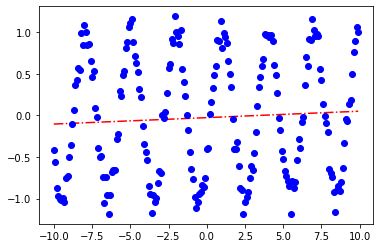

In [15]:
plot_params(sol.x)

Now rerun with a much closer initial guess

In [16]:
ini = [2,.5]
sol = scipy.optimize.minimize(myfunc,ini)
print(sol.fun)
sol.x

2.0920946497952553


array([2.09997985, 0.24198467])

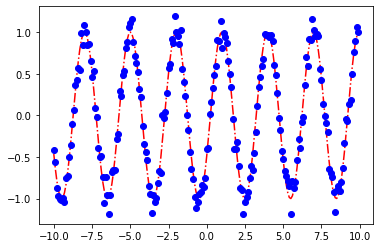

In [17]:
plot_params(sol.x)

2.0920955173209577
[2.09999615 0.2419855 ]


/tmp/ipykernel_11523/2516990896.py:2: OptimizeWarning: Initial guess is not within the specified bounds
  sol = scipy.optimize.minimize(myfunc,ini,bounds=((1.0, 4.1), (0,1)),method="powell")


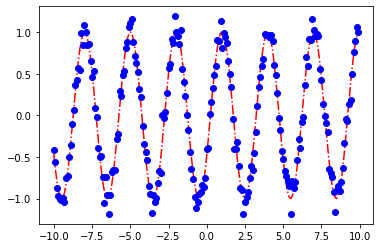

In [18]:
ini = [.1,.5]
sol = scipy.optimize.minimize(myfunc,ini,bounds=((1.0, 4.1), (0,1)),method="powell")
print(sol.fun)
print(sol.x)
plot_params(sol.x)

## CMA example

Now we're going to try with pyCMA and the original initial guess

In [19]:
ini = [1,.5]

Run the optimization and display the results at the end.

In [20]:
es = cma.CMAEvolutionStrategy(ini, 0.5)
es.logger.disp_header()
while not es.stop():
      X = es.ask()
      es.tell(X, [myfunc(x) for x in X])
      es.logger.add()
es.logger.disp([-1])

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1056100, Thu Apr 14 15:18:18 2022)
Iterat Nfevals  function value    axis ratio maxstd  minstd
  153    918 1.64074127665788e+02 8.3e+00 7.90e-09 1.08e-09


Plot the convergence of the CMA-ES algorithm

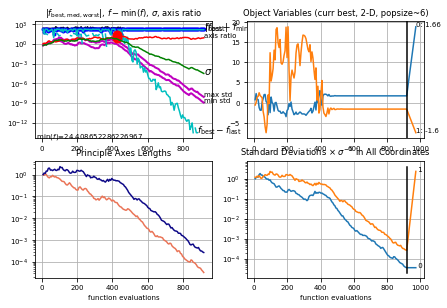

In [21]:
es.logger.plot()

In [22]:
es.best.x

array([ 2.06681366, -3.00887613])

In [23]:
myfunc(es.best.x)

24.408652286226967

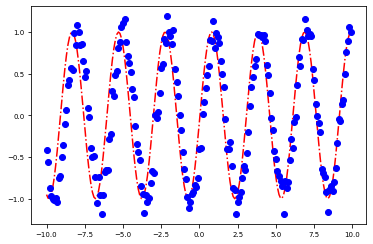

In [24]:
plot_params(es.best.x)

If you re-run this optimization, even with the same initial guess, there is no guarantee of convergence, especially when your initial guess is far away from the actual value.  This is because the success of the algorithm, as well as its ability to reach beyond local minima, is based on injecting randomness into each evolution of the algorithm.  This means that each optimization will produce slightly different results in a different number of steps.  This must be traded off for the ability to escape local minima.

In [25]:
#import scipy.optimize.differential_evolution

res = scipy.optimize.differential_evolution(
                myfunc,
                bounds=[(1.06,4.1),(0,1)],
                popsize=10,
                maxiter=2000,
                tol=1e-6,
                #callback=cb,
                workers=-1,
                polish=False,
                disp=True
            )

/home/danaukes/miniconda3/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py:533: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


differential_evolution step 1: f(x)= 11.8457
differential_evolution step 2: f(x)= 11.8457
differential_evolution step 3: f(x)= 11.1958
differential_evolution step 4: f(x)= 11.1958
differential_evolution step 5: f(x)= 11.1958
differential_evolution step 6: f(x)= 2.2656
differential_evolution step 7: f(x)= 2.2656
differential_evolution step 8: f(x)= 2.2656
differential_evolution step 9: f(x)= 2.2656
differential_evolution step 10: f(x)= 2.2656
differential_evolution step 11: f(x)= 2.2656
differential_evolution step 12: f(x)= 2.2656
differential_evolution step 13: f(x)= 2.17141
differential_evolution step 14: f(x)= 2.0949
differential_evolution step 15: f(x)= 2.0949
differential_evolution step 16: f(x)= 2.0949
differential_evolution step 17: f(x)= 2.0949
differential_evolution step 18: f(x)= 2.0949
differential_evolution step 19: f(x)= 2.0949
differential_evolution step 20: f(x)= 2.0949
differential_evolution step 21: f(x)= 2.09302
differential_evolution step 22: f(x)= 2.09274
differentia

In [26]:
res

     fun: 2.0920947701810624
 message: 'Optimization terminated successfully.'
    nfev: 700
     nit: 34
 success: True
       x: array([2.09997756, 0.24196964])

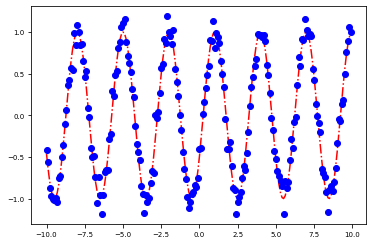

In [27]:
plot_params(res.x)